# Example

This notebook contains an example of intializing and running an episode of the current market implementation for assymetric herding and trading

In [1]:
import matplotlib.pyplot as plt
from market_model import Market

import numpy as np
import utility
from scipy.stats import norm
from scipy.optimize import curve_fit

We will set the number of agents to 10,000. We are using alpha and delta_R values calculated from the S&P September through December 2008.

In [2]:
N = 10000
alpha = 0.25 # determined from data
p = 0.0154 # fixed value used determined by another paper
M = 50 # supposedly any value 50-500 is fine
delta_R = 4 # value used in paper can also be determined from data
t_end = 100
c = 1/80

market = Market(N,alpha, p, M,t_end, delta_R)

# For assymetric trading preferences
#market = Market(N, alpha,p, M, t_end, c=c, asymmetric_preference=True)

Initializing Market


This block runs the market simulation

In [3]:
market.run_market()

## Plots
Below are a few plots to visualize the return, volatility, and herding history

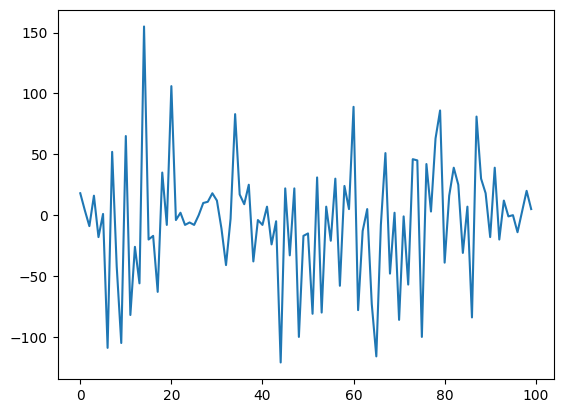

In [4]:
plt.plot(market.return_hist)

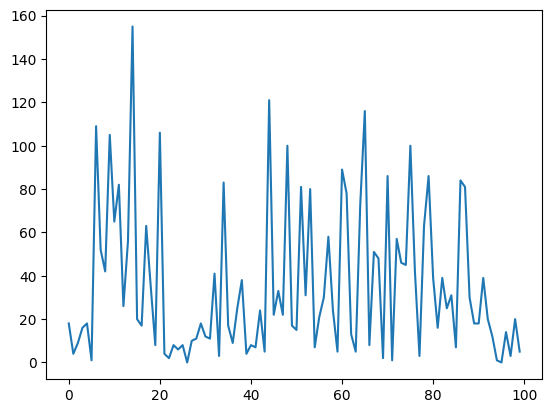

In [5]:
plt.plot(market.volatility_hist)

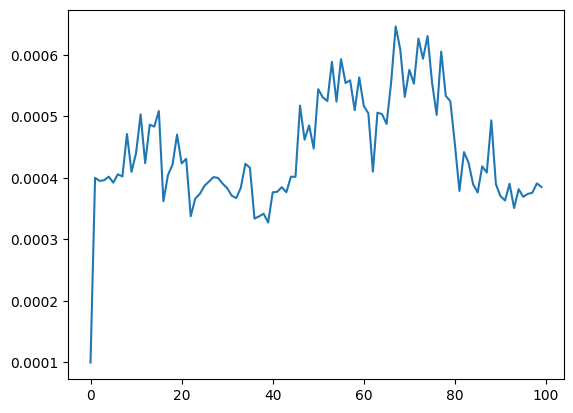

In [6]:
plt.plot(market.herding_hist)

## Graph of interest: Return Volatility
Below we have two implementations of Return Volatility. The first is using the calculation from the paper and the second is using a calculation found in a reference paper.

Text(0.5, 0, 't (day)')

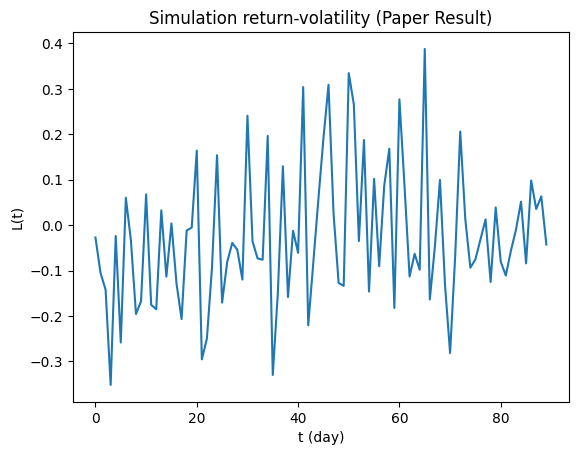

In [7]:
t_end = 90
ret_vol_cor=np.zeros(t_end)
for i in range(t_end):
    ret_vol_cor[i] = utility.calc_L(utility.calc_normalized_return(market.return_hist),i)
plt.plot(ret_vol_cor)
plt.title("Simulation return-volatility (Paper Result)")
plt.ylabel("L(t)")
plt.xlabel("t (day)")

Text(0.5, 0, 't (day)')

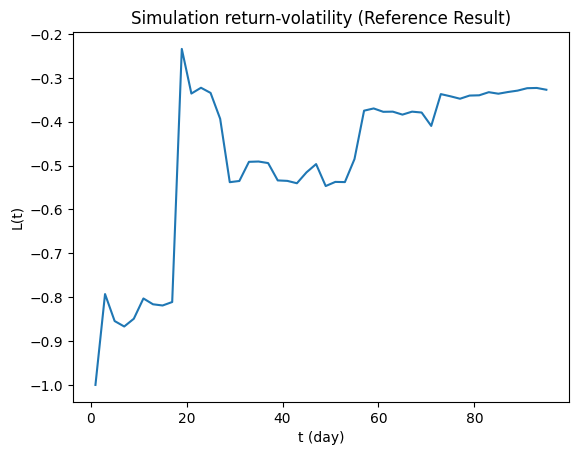

In [8]:
lt = utility.calc_L_new(market.t, market.M, market.return_hist)
x = np.arange(1, 2*(len(lt)), 2)
plt.plot(x, lt)
plt.title("Simulation return-volatility (Reference Result)")
plt.ylabel("L(t)")
plt.xlabel("t (day)")

Here you will see that we are able to experience the leverage effect in the second calculation. In the first calculation however, we see the return volatility to hover around 0.